In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import re

from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data_train = pd.read_csv('train.csv')

### DATA CLEANING EDA


In [3]:
data_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
data_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [6]:
data_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
data_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
data_train['keyword'] = data_train['keyword'].fillna('none')

In [9]:
data_train['location'] = data_train['location'].fillna('unknown')

In [10]:
data_train.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [11]:
def clean_text(text):
    
    text = re.sub(r'http\S+|www\.\S+', '', text)
   
    text = re.sub(r'\#\w+|@\w+', '', text)
   
    text = re.sub(r'[^a-zA-Z\s]', '', text)
  
    text = text.lower()
    return text

# Apply cleaning
data_train['cleaned_text'] = data_train['text'].apply(clean_text)

In [12]:
data_train['cleaned_text']

0       our deeds are the reason of this  may allah fo...
1                   forest fire near la ronge sask canada
2       all residents asked to shelter in place are be...
3        people receive  evacuation orders in california 
4       just got sent this photo from ruby  as smoke f...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609      the out of control wild fires in california ...
7610                        m  utckm s of volcano hawaii 
7611    police investigating after an ebike collided w...
7612    the latest more homes razed by northern califo...
Name: cleaned_text, Length: 7613, dtype: object

In [13]:
data_train[data_train['keyword'].isna()]

,id,keyword,location,text,target,cleaned_text


In [14]:
data_train[data_train['location'].isna()]

,id,keyword,location,text,target,cleaned_text


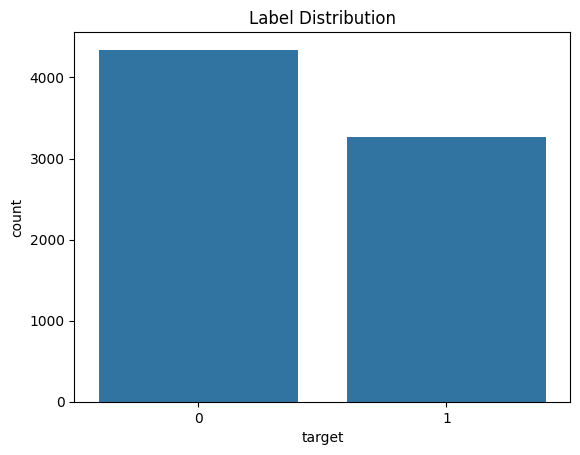

In [15]:


# Plot label distribution
sns.countplot(x='target', data=data_train)  # Replace 'label_column' with your label column
plt.title('Label Distribution')
plt.show()

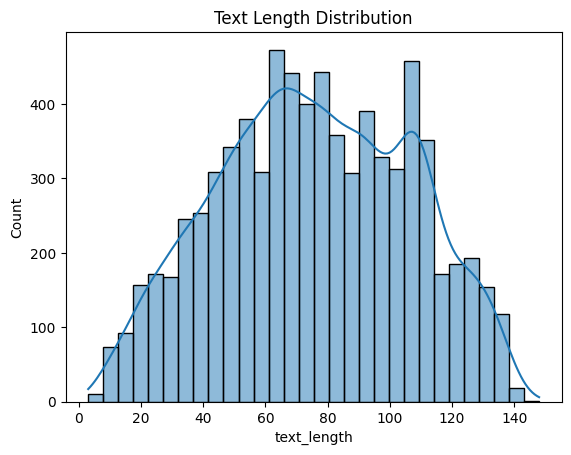

In [16]:
data_train['text_length'] = data_train['cleaned_text'].apply(len)

# Plot text length distribution
sns.histplot(data_train['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.show()


### EDA Preprocessing Data

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Tokenizes the cleaned text data into individual words.

Counts the frequency of each word using the Counter class from the collections module

In [18]:
all_words = [word for text in data_train['cleaned_text'] for word in word_tokenize(text)]
word_freq = Counter(all_words)

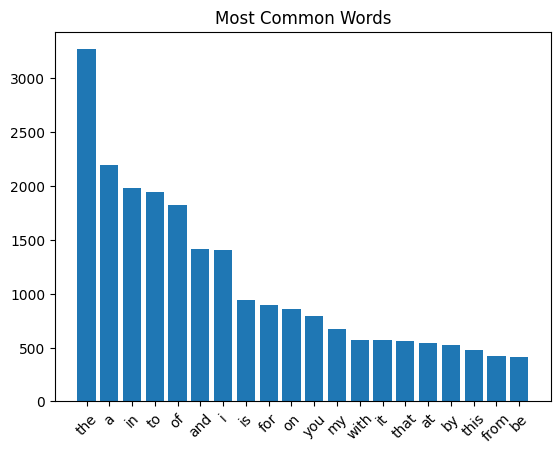

In [19]:
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

plt.bar(words, counts)
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.show()

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Stop words are often removed during text preprocessing in natural language processing (NLP) tasks to reduce noise and improve the performance of text analysis models.

In [21]:
stop_words = set(stopwords.words('english'))

In [22]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [23]:
def remove_stopwords(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stop_words])

data_train['cleaned_text'] = data_train['cleaned_text'].apply(remove_stopwords)

In [24]:
data_train['cleaned_text']

0                       deeds reason may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3             people receive evacuation orders california
4                  got sent photo ruby smoke pours school
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    control wild fires california even northern pa...
7610                                 utckm volcano hawaii
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: cleaned_text, Length: 7613, dtype: object

In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

WordNetLemmatizer class. The lemmatizer is used to reduce words to their base or root form (lemma).

In [26]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

data_train['cleaned_text'] = data_train['cleaned_text'].apply(lemmatize_text)

In [27]:
data_train['cleaned_text']


0                         deed reason may allah forgive u
1                   forest fire near la ronge sask canada
2       resident asked shelter place notified officer ...
3              people receive evacuation order california
4                  got sent photo ruby smoke pours school
                              ...                        
7608    two giant crane holding bridge collapse nearby...
7609    control wild fire california even northern par...
7610                                 utckm volcano hawaii
7611    police investigating ebike collided car little...
7612    latest home razed northern california wildfire...
Name: cleaned_text, Length: 7613, dtype: object

In [28]:
data_train.head()

,id,keyword,location,text,target,cleaned_text,text_length
0,1,none,unknown,Our Deeds are the Reason of this #earthquake M...,1,deed reason may allah forgive u,58
1,4,none,unknown,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,37
2,5,none,unknown,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,130
3,6,none,unknown,"13,000 people receive #wildfires evacuation or...",1,people receive evacuation order california,49
4,7,none,unknown,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby smoke pours school,71


### DATA CLEAN FOR TEST-DATASET

In [29]:
data_test = pd.read_csv(r'test.csv')

In [30]:
data_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [31]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [32]:
data_test.describe()

,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


In [33]:
data_test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [34]:
data_test['keyword'] = data_test['keyword'].fillna('none')
data_test['location'] = data_test['location'].fillna('none')

In [35]:
data_test.isnull().sum()

id          0
keyword     0
location    0
text        0
dtype: int64

In [36]:
def clean_text(text):
    
    text = re.sub(r'http\S+|www\.\S+', '', text)
   
    text = re.sub(r'\#\w+|@\w+', '', text)
   
    text = re.sub(r'[^a-zA-Z\s]', '', text)
  
    text = text.lower()
    return text

# Apply cleaning
data_test['cleaned_text'] = data_test['text'].apply(clean_text)

In [37]:
data_test['cleaned_text']

0                      just happened a terrible car crash
1       heard about  is different cities stay safe eve...
2       there is a forest fire at spot pond geese are ...
3                                   apocalypse lighting  
4             typhoon soudelor kills  in china and taiwan
                              ...                        
3258    earthquake safety los angeles  safety fastener...
3259    storm in ri worse than last hurricane my citya...
3260                    green line derailment in chicago 
3261            meg issues hazardous weather outlook hwo 
3262          has activated its municipal emergency plan 
Name: cleaned_text, Length: 3263, dtype: object

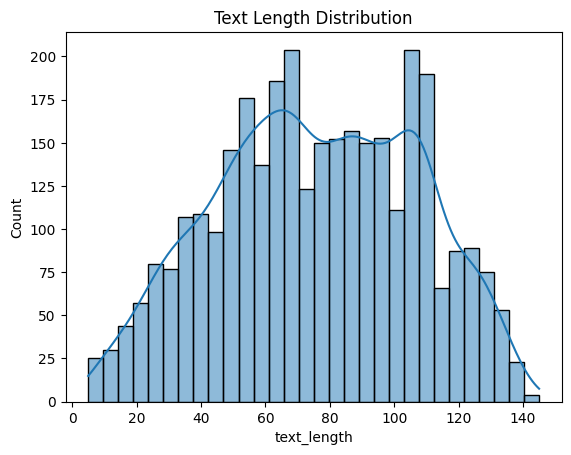

In [38]:
data_test['text_length'] = data_test['cleaned_text'].apply(len)

# Plot text length distribution
sns.histplot(data_test['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.show()


In [39]:
all_words = [word for text in data_test['cleaned_text'] for word in word_tokenize(text)]
word_freq = Counter(all_words)

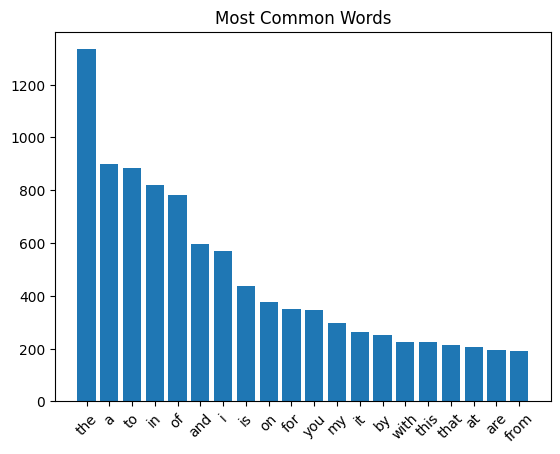

In [40]:
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

plt.bar(words, counts)
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.show()

In [41]:
stop_words = set(stopwords.words('english'))

In [42]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [43]:
def remove_stopwords(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stop_words])

data_test['cleaned_text'] = data_test['cleaned_text'].apply(remove_stopwords)

In [44]:
data_test['cleaned_text']

0                             happened terrible car crash
1               heard different cities stay safe everyone
2       forest fire spot pond geese fleeing across str...
3                                     apocalypse lighting
4                     typhoon soudelor kills china taiwan
                              ...                        
3258    earthquake safety los angeles safety fasteners...
3259    storm ri worse last hurricane cityampothers ha...
3260                        green line derailment chicago
3261             meg issues hazardous weather outlook hwo
3262                   activated municipal emergency plan
Name: cleaned_text, Length: 3263, dtype: object

In [45]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

data_test['cleaned_text'] = data_test['cleaned_text'].apply(lemmatize_text)

In [46]:
data_test['cleaned_text']

0                             happened terrible car crash
1                 heard different city stay safe everyone
2       forest fire spot pond goose fleeing across str...
3                                     apocalypse lighting
4                      typhoon soudelor kill china taiwan
                              ...                        
3258    earthquake safety los angeles safety fastener ...
3259    storm ri worse last hurricane cityampothers ha...
3260                        green line derailment chicago
3261              meg issue hazardous weather outlook hwo
3262                   activated municipal emergency plan
Name: cleaned_text, Length: 3263, dtype: object

In [47]:
data_test.head()

,id,keyword,location,text,cleaned_text,text_length
0,0,none,none,Just happened a terrible car crash,happened terrible car crash,34
1,2,none,none,"Heard about #earthquake is different cities, s...",heard different city stay safe everyone,51
2,3,none,none,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...,94
3,9,none,none,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting,21
4,11,none,none,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,43


In [48]:
#Word2Ve representation

all_sentences = data_train['cleaned_text'].tolist()
word2vec_model = Word2Vec(sentences=all_sentences, vector_size=100, window=5, min_count=1, workers=4)

In [49]:
# Function to compute average Word2Vec vector

def average_word2vec(tokens, model, vector_size=100):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

In [50]:
# Compute Word2Vec features
data_train['features'] = data_train['cleaned_text'].apply(lambda x: average_word2vec(x, word2vec_model))
data_test['features'] = data_test['cleaned_text'].apply(lambda x: average_word2vec(x, word2vec_model))

In [51]:
# Prepare data for machine learning
X = np.vstack(data_train['features'].values)
y = data_train['target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = logistic.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [54]:
acc_score = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'accuracy_score : {acc_score}')
print(f'classification_report : {class_report}')

accuracy_score : 0.618516086671044
classification_report :               precision    recall  f1-score   support

           0       0.62      0.86      0.72       874
           1       0.61      0.29      0.40       649

    accuracy                           0.62      1523
   macro avg       0.61      0.58      0.56      1523
weighted avg       0.62      0.62      0.58      1523



In [55]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
y_pred_rf = randomforest.predict(X_test)
y_pred_rf

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [57]:
acc_score = accuracy_score(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)
print(f'accuracy_score : {acc_score}')
print(f'classification_report : {class_report}')

accuracy_score : 0.659881812212738
classification_report :               precision    recall  f1-score   support

           0       0.67      0.80      0.73       874
           1       0.64      0.47      0.54       649

    accuracy                           0.66      1523
   macro avg       0.65      0.64      0.63      1523
weighted avg       0.66      0.66      0.65      1523



In [58]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': None, 'n_estimators': 200}


In [59]:
scores = cross_val_score(logistic, X, y, cv=5)
print("Cross-validation accuracy:", scores.mean())


Cross-validation accuracy: 0.6094807347349402


In [60]:
logistic.fit(X,y)

LogisticRegression()

In [61]:
X_test_w2v = np.vstack(data_test['features'].values)
print(X_test_w2v.shape) 



(3263, 100)


In [62]:
print(data_test.columns)


Index(['id', 'keyword', 'location', 'text', 'cleaned_text', 'text_length',
       'features'],
      dtype='object')


In [63]:
y_pred = logistic.predict(X_test_w2v)
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [64]:
randomforest.fit(X,y)

RandomForestClassifier()

In [65]:
y_pred = randomforest.predict(X_test_w2v)
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

## Save to .csv file

In [66]:
df_predictions = pd.DataFrame(y_pred, columns=['target'])


df_predictions = pd.concat([data_test['id'], df_predictions], axis=1)


df_predictions.to_csv('predictions.csv', index=False)